# <div align="center">CP421 Data Mining - Assignment 2</div>
### <div align="center">Due Date: Nov 6, 2023 at 11:59 PM</div>

#### Imports:

In [1]:
import numpy as np
import pandas as pd
import csv
from collections import Counter
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\twbm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\twbm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\twbm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Text Preprocessing

#### 1. Tokenization 
Tokenization refers to the process of breaking down a piece of text into smaller units, commonly known as tokens. Typically, tokens are words, but they can also be phrases, sentences, or any other unit that makes sense for the specific analysis. Tokenization is essential because it helps convert the unstructured form of textual data into a form that can be utilized in various Natural Language Processing (NLP) tasks.

In [7]:
filename = 'bbc-news-data-modified.csv'

df = pd.read_csv(filename)

df['Tokens'] = df['title'] + ' ' + df['content']

tokens = df['Tokens'].str.split()
print(tokens.head())

0    [Ad, sales, boost, Time, Warner, profit, Quart...
1    [Dollar, gains, on, Greenspan, speech, The, do...
2    [Yukos, unit, buyer, faces, loan, claim, The, ...
3    [High, fuel, prices, hit, BA's, profits, Briti...
4    [Pernod, takeover, talk, lifts, Domecq, Shares...
Name: Tokens, dtype: object


#### 2. Stop Words Removal 
Stop words removal are commonly used words in any language which don’t add much meaning to a sentence. Words like ‘and’, ‘the’, ‘is’, and ‘in’ are examples of stop words. In text mining and search engines, these words are eliminated from the text to expedite the processing.

In [8]:
stop_words = set(stopwords.words('english'))
tokens = tokens.apply(lambda words: [word for word in words if word.lower() not in stop_words])

print(tokens.head())

0    [Ad, sales, boost, Time, Warner, profit, Quart...
1    [Dollar, gains, Greenspan, speech, dollar, hit...
2    [Yukos, unit, buyer, faces, loan, claim, owner...
3    [High, fuel, prices, hit, BA's, profits, Briti...
4    [Pernod, takeover, talk, lifts, Domecq, Shares...
Name: Tokens, dtype: object


#### 3. Lemmatization and Stemming 
Lemmatization and stemming involves converting a word to its base or dictionary form. For instance, ‘running’ becomes ‘run’, ‘better’ becomes ‘good’.

In [9]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

tokens = tokens.apply(lambda words: [stemmer.stem(lemmatizer.lemmatize(word)) for word in words])
print(tokens.head())

0    [ad, sale, boost, time, warner, profit, quarte...
1    [dollar, gain, greenspan, speech, dollar, hit,...
2    [yuko, unit, buyer, face, loan, claim, owner, ...
3    [high, fuel, price, hit, ba', profit, british,...
4    [pernod, takeov, talk, lift, domecq, share, uk...
Name: Tokens, dtype: object


#### 4. Vectorizerization
Vectorizerization can be used to transform the text data into a matrix of TF-IDF features. This matrix serves as the input for the clustering algorithms, enabling them to cluster the documents based on the significance and occurrence of terms within them

In [11]:
documents = [' '.join(doc) for doc in tokens]

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

text = pd.DataFrame(data=tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(text.head())

        000  000m   05        10  100  100m  102  104  10bn  10th  ...  \
0  0.027281   0.0  0.0  0.028604  0.0   0.0  0.0  0.0   0.0   0.0  ...   
1  0.000000   0.0  0.0  0.000000  0.0   0.0  0.0  0.0   0.0   0.0  ...   
2  0.000000   0.0  0.0  0.000000  0.0   0.0  0.0  0.0   0.0   0.0  ...   
3  0.022699   0.0  0.0  0.023800  0.0   0.0  0.0  0.0   0.0   0.0  ...   
4  0.000000   0.0  0.0  0.047539  0.0   0.0  0.0  0.0   0.0   0.0  ...   

    yugansk  yuganskneftega  yuganskneftegas      yuko     yukos  yushchenko  \
0  0.000000             0.0              0.0  0.000000  0.000000         0.0   
1  0.000000             0.0              0.0  0.000000  0.000000         0.0   
2  0.438987             0.0              0.0  0.264698  0.132349         0.0   
3  0.000000             0.0              0.0  0.000000  0.000000         0.0   
4  0.000000             0.0              0.0  0.000000  0.000000         0.0   

   zealand  zero  zone  zurich  
0      0.0   0.0   0.0     0.0  
1      0

# Models

## 1. K-means Clustering: 
With the processed text, segregate the news articles into 5 distinct clusters using the K-means algorithm.

In [12]:
kmeans = KMeans(init="random", n_clusters=5, random_state=0,n_init=10).fit(text)
print(kmeans.labels_)

[1 1 1 ... 3 3 0]


##### 1) Report the number of articles encapsulated in each cluster

In [13]:
kmeans_counts = Counter(kmeans.labels_)

for cluster_label, count in kmeans_counts.items():
    print(f'Cluster {cluster_label}: {count} articles')

Cluster 1: 479 articles
Cluster 3: 740 articles
Cluster 2: 303 articles
Cluster 0: 511 articles
Cluster 4: 192 articles


##### 2) Illustrate the clusters derived from every clustering technique, employing PCA condensed to 2 components. Plot these clusters after dimensionality reduction.

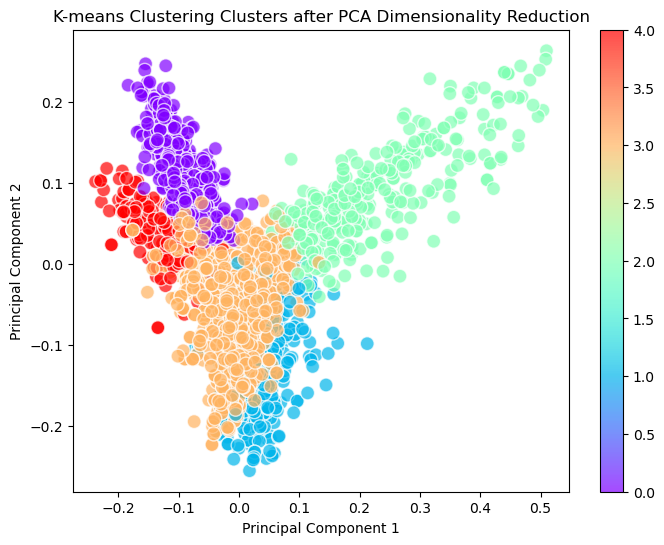

In [14]:
pca = PCA(n_components=2)
text_pca = pca.fit_transform(text)

plt.figure(figsize=(8, 6))
kmeans_scatter = plt.scatter(text_pca[:,0], text_pca[:,1], c=kmeans.labels_, cmap='rainbow', alpha=0.7, edgecolors='w', s=100)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Clusters after PCA Dimensionality Reduction')
plt.colorbar(kmeans_scatter)

plt.show()

##### 4) Utilize the WCSS method to identify the ideal number of clusters k for the K-means algorithm

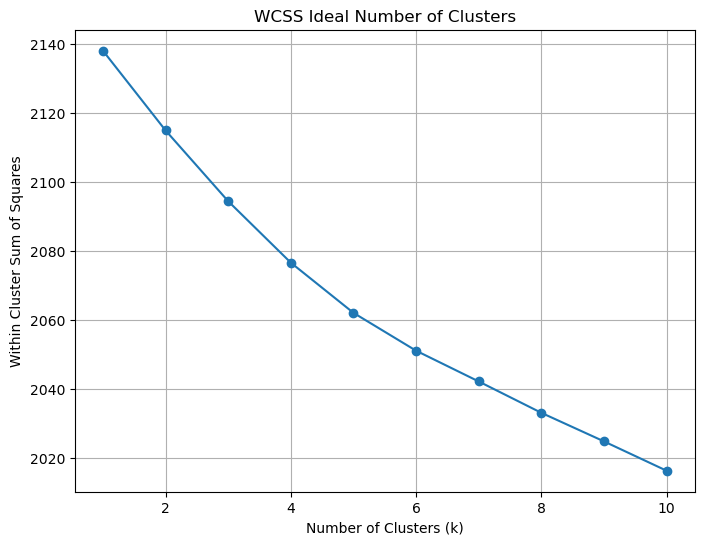

In [16]:
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(text)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.title('WCSS Ideal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within Cluster Sum of Squares')
plt.grid(True)
plt.show()

## 2. DBSCAN Clustering: 
Utilize the preprocessed text and implement the DBSCAN clustering algorithm.

##### 3) Implement the K-distance Graph to estimate the optimal eps

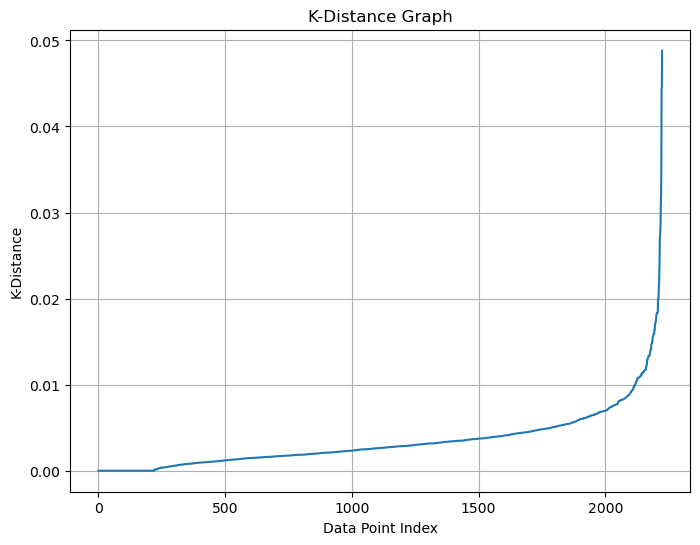

In [17]:
eps_values = np.arange(0.05, 0.15, 0.01)

nn_model = NearestNeighbors(n_neighbors=2).fit(text_pca)
k_distances, indices = nn_model.kneighbors(text_pca)
k_distances = np.sort(k_distances, axis=0)[:,1]
plt.figure(figsize=(8, 6))
plt.plot(k_distances)

plt.title('K-Distance Graph')
plt.xlabel('Data Point Index')
plt.ylabel('K-Distance')
plt.grid(True)
plt.show()

From the above graph, we can aproximate the optimal eps value at 0.01

In [18]:
eps = 0.01
dbs = DBSCAN(eps=0.01, min_samples=2).fit(text)
labels = dbs.labels_
print(labels)

[-1 -1 -1 ... -1 -1 -1]


##### 3 b) Quantify the count of detected noise points and compare the clustering result with the outcomes from other clustering methods. Comment on your observations.

In [19]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of Clusters: {n_clusters}")
print(f"Number of Noise Points: {n_noise}")

Number of Clusters: 110
Number of Noise Points: 2005


##### 1) Report the number of articles encapsulated in each cluster

In [20]:
dbs_counts = Counter(dbs.labels_)

for cluster_label, count in dbs_counts.items():
    print(f'Cluster {cluster_label}: {count} articles')

Cluster -1: 2005 articles
Cluster 0: 2 articles
Cluster 1: 2 articles
Cluster 2: 2 articles
Cluster 3: 2 articles
Cluster 4: 2 articles
Cluster 5: 2 articles
Cluster 6: 2 articles
Cluster 7: 2 articles
Cluster 8: 2 articles
Cluster 9: 2 articles
Cluster 10: 2 articles
Cluster 11: 2 articles
Cluster 12: 2 articles
Cluster 13: 2 articles
Cluster 14: 2 articles
Cluster 15: 2 articles
Cluster 16: 2 articles
Cluster 17: 2 articles
Cluster 18: 2 articles
Cluster 19: 2 articles
Cluster 20: 2 articles
Cluster 21: 2 articles
Cluster 22: 2 articles
Cluster 23: 2 articles
Cluster 24: 2 articles
Cluster 25: 2 articles
Cluster 26: 2 articles
Cluster 27: 2 articles
Cluster 28: 2 articles
Cluster 29: 2 articles
Cluster 30: 2 articles
Cluster 31: 2 articles
Cluster 32: 2 articles
Cluster 33: 2 articles
Cluster 34: 2 articles
Cluster 35: 2 articles
Cluster 36: 2 articles
Cluster 37: 2 articles
Cluster 38: 2 articles
Cluster 39: 2 articles
Cluster 40: 2 articles
Cluster 41: 2 articles
Cluster 42: 2 arti

##### 2) Illustrate the clusters derived from every clustering technique, employing PCA condensed to 2 components. Plot these clusters after dimensionality reduction.

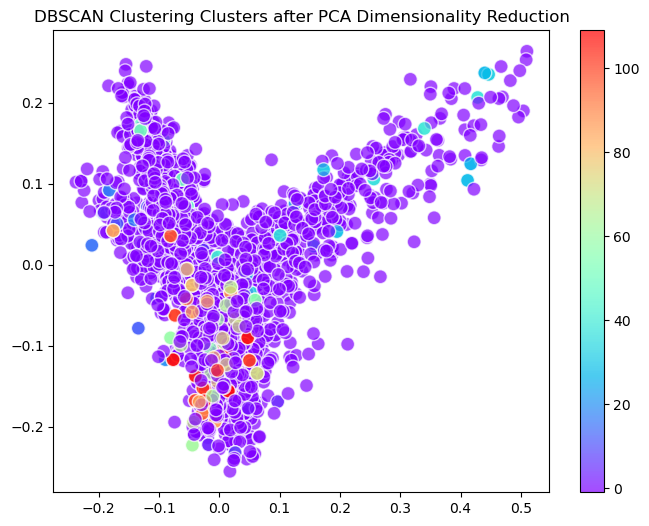

In [21]:
plt.figure(figsize=(8, 6))
dbs_scatter = plt.scatter(text_pca[:,0], text_pca[:,1], c=dbs.labels_, cmap='rainbow', alpha=0.7, edgecolors='w', s=100)

plt.title('DBSCAN Clustering Clusters after PCA Dimensionality Reduction')
plt.colorbar(dbs_scatter)

plt.show()

#### 3. Gaussian Mixture Model (GMM) Clustering: 
Allocate the news articles into 5 clusters leveraging the Gaussian Mixture Model.

In [26]:
gmm = GaussianMixture(n_components=5, random_state=0).fit(text.values)
gmm_labels = gmm.predict(text.values)
gmm_counts = Counter(gmm_labels)
print(gmm_labels)

##### 1) Report the number of articles encapsulated in each cluster

In [27]:
for cluster, count in gmm_counts.items():
    print(f"Cluster {cluster}: {count} articles")

Cluster 1: 819 articles
Cluster 3: 354 articles
Cluster 4: 206 articles
Cluster 0: 345 articles
Cluster 2: 501 articles


##### 2) Illustrate the clusters derived from every clustering technique, employing PCA condensed to 2 components. Plot these clusters after dimensionality reduction.

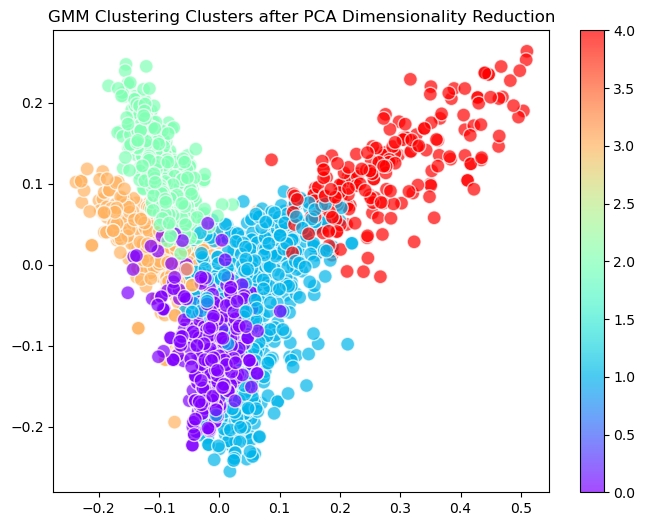

In [29]:
plt.figure(figsize=(8, 6))
gmm_scatter = plt.scatter(text_pca[:,0], text_pca[:,1], c=gmm_labels, cmap='rainbow', alpha=0.7, edgecolors='w', s=100)

plt.title('GMM Clustering Clusters after PCA Dimensionality Reduction')
plt.colorbar(gmm_scatter)

plt.show()

#### 4. Agglomerative Clustering: 
Administer Agglomerative Clustering on the processed text, aiming to form 5 Coherent Clusters

In [23]:
Agg_clustering = AgglomerativeClustering(n_clusters = 5).fit(text)
print(Agg_clustering.labels_)

[0 0 0 ... 0 4 4]


##### 1) Report the number of articles encapsulated in each cluster

In [24]:
agg_counts = Counter(Agg_clustering.labels_)

for cluster_label, count in agg_counts.items():
    print(f'Cluster {cluster_label}: {count} articles')

Cluster 0: 1052 articles
Cluster 4: 343 articles
Cluster 2: 158 articles
Cluster 1: 492 articles
Cluster 3: 180 articles


##### 2) Illustrate the clusters derived from every clustering technique, employing PCA condensed to 2 components. Plot these clusters after dimensionality reduction.

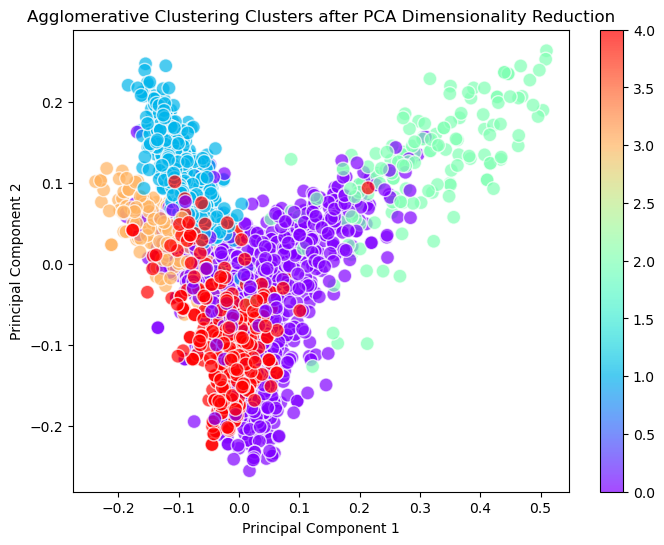

In [25]:
plt.figure(figsize=(8, 6))
agg_scatter = plt.scatter(text_pca[:,0], text_pca[:,1], c=Agg_clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='w', s=100)

plt.title('Agglomerative Clustering Clusters after PCA Dimensionality Reduction')
plt.colorbar(agg_scatter)
plt.show()